Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


/Users/masato.morita/Library/Caches/pypoetry/virtualenvs/til-ux4RAgS2-py3.12/lib/python3.12/site-packages/rich/live
.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


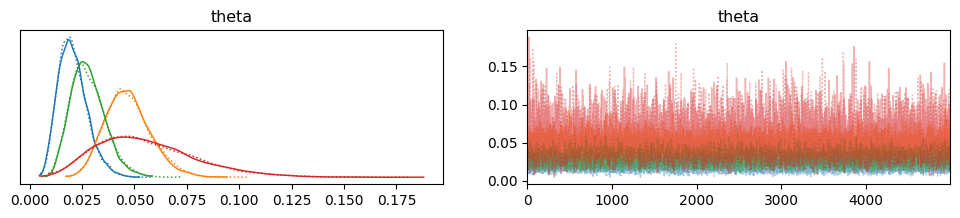

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

n = [434, 382, 394, 88]
clicks = [8, 17, 10, 4]
with pm.Model() as model_comb:
    theta = pm.Uniform("theta", lower=0, upper=1, shape=len(n))
    obs = pm.Binomial("obs", n=n, p=theta, observed=clicks)
    trace = pm.sample(5000, chains=2)
    pm.plot_trace(trace, compact=True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


/Users/masato.morita/Library/Caches/pypoetry/virtualenvs/til-ux4RAgS2-py3.12/lib/python3.12/site-packages/rich/live
.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


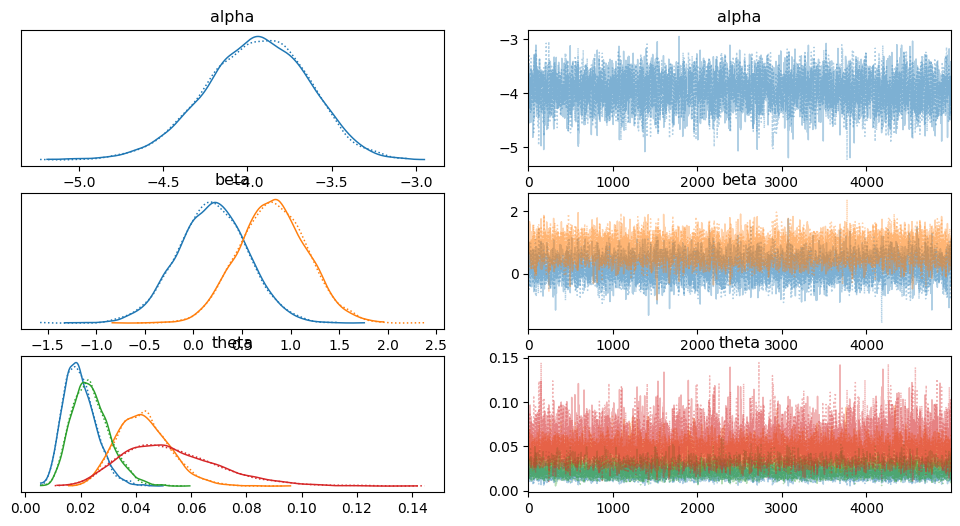

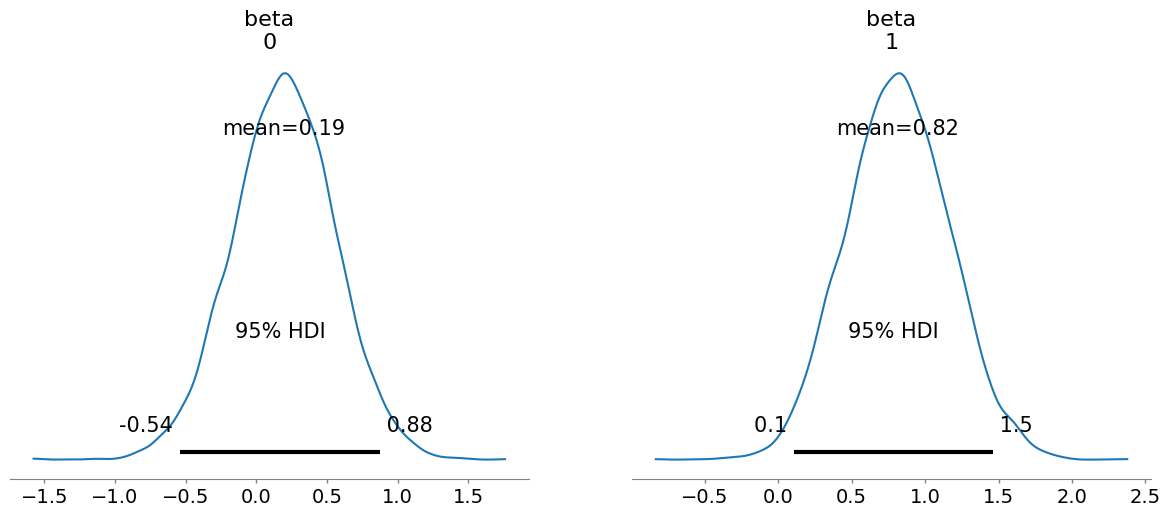

In [2]:
n = [434, 382, 394, 88]
clicks = [8, 17, 10, 4]
img_dummy = [0, 0, 1, 1]
btn_dummy = [0, 1, 0, 1]

# 統計モデルを記述
with pm.Model() as model_comb:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    comb = alpha + beta[0] * img_dummy + beta[1] * btn_dummy
    theta = pm.Deterministic("theta", 1 / (1 + pm.math.exp(-comb)))
    obs = pm.Binomial("obs", n=n, p=theta, observed=clicks)
    trace_comb = pm.sample(5000, chains=2)

# ベイズ推定結果の確認
with model_comb:
    pm.plot_trace(trace_comb, compact=True)

# 事後分布の可視化
with model_comb:
    pm.plot_posterior(trace_comb, var_names=["beta"], hdi_prob=0.95)


In [ ]:
# 上のbeta1の信念(brief)の確率分布にて、beta1が0より大きい値をとる累積確率を計算


<xarray.DataArray 'beta' (chain: 2, draw: 5000, beta_dim_0: 2)> Size: 160kB
array([[[ 0.82206436,  0.99276401],
        [ 0.83606021,  1.36990946],
        [ 0.58518819,  1.22136596],
        ...,
        [-0.2578445 ,  0.32905846],
        [-0.18319195,  0.61611535],
        [ 1.07698912,  1.12868948]],

       [[ 0.10293737,  0.83374302],
        [ 0.51990797,  1.23508235],
        [ 0.47578222,  0.74633781],
        ...,
        [ 0.4336163 ,  0.45717585],
        [ 0.15683775,  1.00939699],
        [ 0.46395399,  0.67847343]]])
Coordinates:
  * chain       (chain) int64 16B 0 1
  * draw        (draw) int64 40kB 0 1 2 3 4 5 ... 4994 4995 4996 4997 4998 4999
  * beta_dim_0  (beta_dim_0) int64 16B 0 1

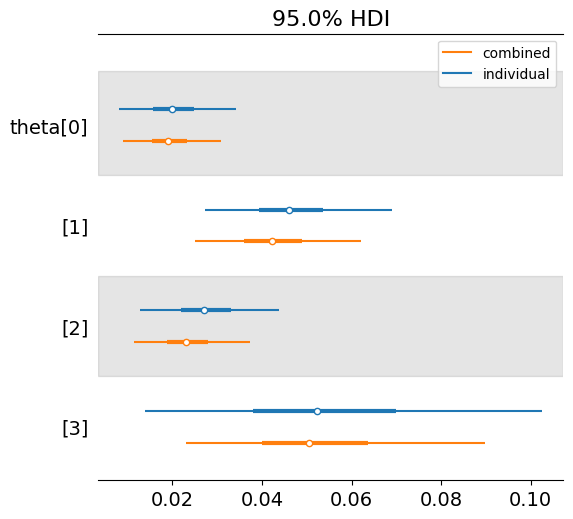

In [13]:
# 95%HDIを確認
with pm.Model():
    pm.plot_forest(
        [trace, trace_comb],
        var_names=["theta"],
        hdi_prob=0.95,
        combined=True,
        model_names=["individual", "combined"],
    )